In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
diabetes.target[:3]

array([151.,  75., 141.])

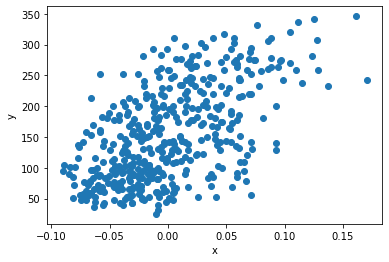

In [5]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
x = diabetes.data[:,2]
y = diabetes.target

## 경사 하강법으로 학습

In [7]:
w =1.0
b =1.0

In [8]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [9]:
print(y[0])

151.0


In [10]:
w_inc = w + 0.1   # 1차 함수의 기울기를 0.1만큼 높여준다
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [11]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [12]:
# w값 조정 후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [13]:
# 변화율로 가중치 업데이트
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [14]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [15]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [16]:
b_new = b + 1
print(b_new)

2.0


## 능동적으로 업데이트 하기 위한 오차 역전파

In [17]:
# 오차와 변화율을 곱하여 가중치 업데이트
err = y[0] - y_hat  #y[0] = 151.0 / y_hat = 150.41066251735467
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [18]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [19]:
w

1.0

In [20]:
w_rate

-0.0514740612388061

In [21]:
a =(1.0 + (-0.0514740612388061) * (151.0-150.41066251735467))
a

0.9696644063279902

In [22]:
# 전체 샘플 반복
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


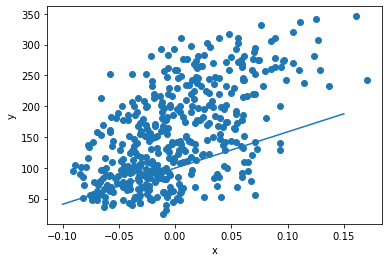

In [23]:
# 그래프 그리기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
# 여러 에포크 반복
for i in range(1, 100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


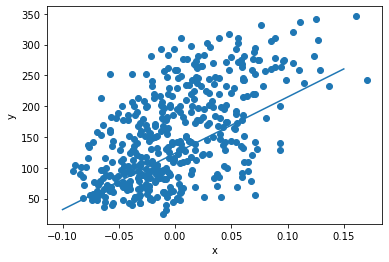

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
# y_hat = 913.6x + 123.4

In [27]:
# 모델 예측
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


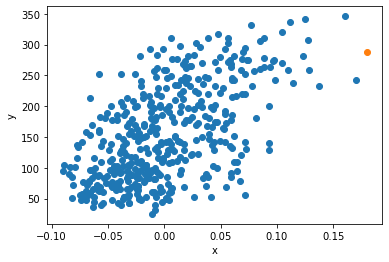

In [28]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
# 가중치에 대하여 제곱 오차 미분
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

In [ ]:
# 절편에 대하여 제곱 오차 미분